In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### 1)

In [3]:
df= pd.read_csv('f8.txt', sep='   ',index_col=None,header = None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
dfnorm = df.apply(lambda i : (i - i.mean())/i.std())

In [5]:
X = dfnorm.values

In [6]:
km = KMeans(n_clusters = 5)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
dfnorm['lab'] = km.labels_

In [8]:
cen=km.cluster_centers_

### 2)

The given data has 64 dimensions. It is not possible to directly visualise this. We have to aim to depict these 64 attributes in 2 dimensions. One way in which we can do this is, for a given point, to show each attribute on the x axis and the corresponding value of that attribute on the y axis. Since the data is normalised, all attributes have the same range of values, hence this is possible. Then we can depict the instance by the piecewise smooth curve joining all these points. 
All the instances can be plotted on this same graph with distinct colours for distinct clusters, and all instances in the same cluster having the same colour. 

### 3)

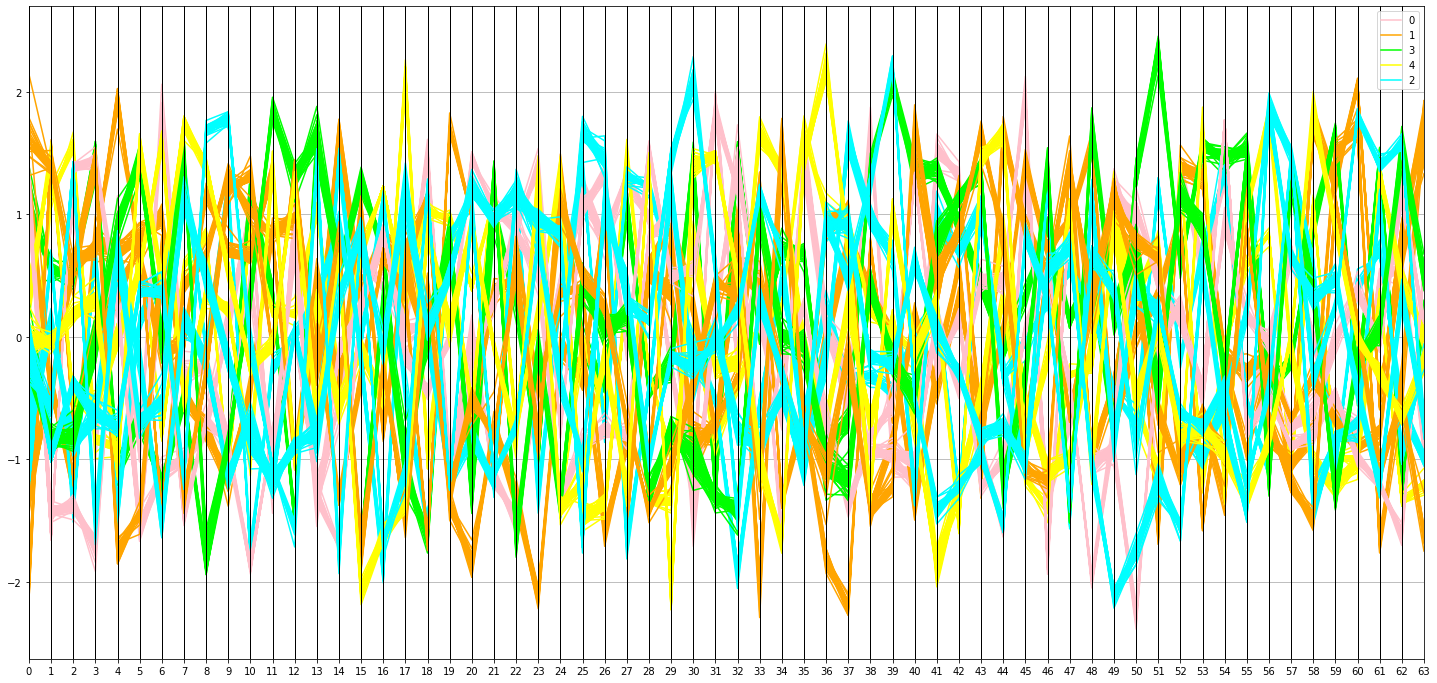

In [9]:
plt.figure(figsize=(25,12))
pd.plotting.parallel_coordinates(dfnorm,'lab',color=('pink','orange','lime','yellow','cyan'))
plt.show()

### 4)

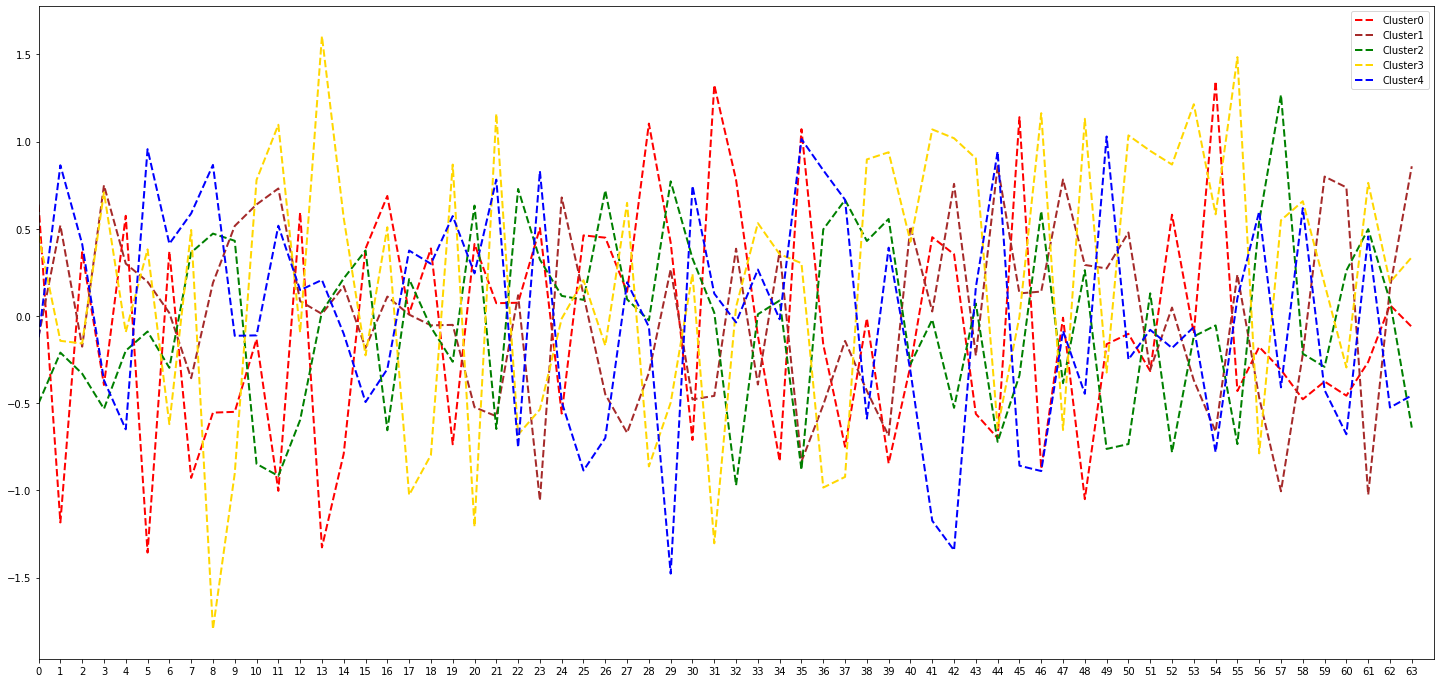

In [10]:
plt.figure(figsize=(25,12))
for i,j in enumerate(['red','brown','green','gold','blue']):
    a = sns.lineplot(x = range(64),y=cen[i],linestyle='--',linewidth=2,color=j,label='Cluster'+str(i))
a.set_xlim([0,64])    
a.set_xticks(range(64))    
plt.show()    

Centers of each cluster are as shown above.

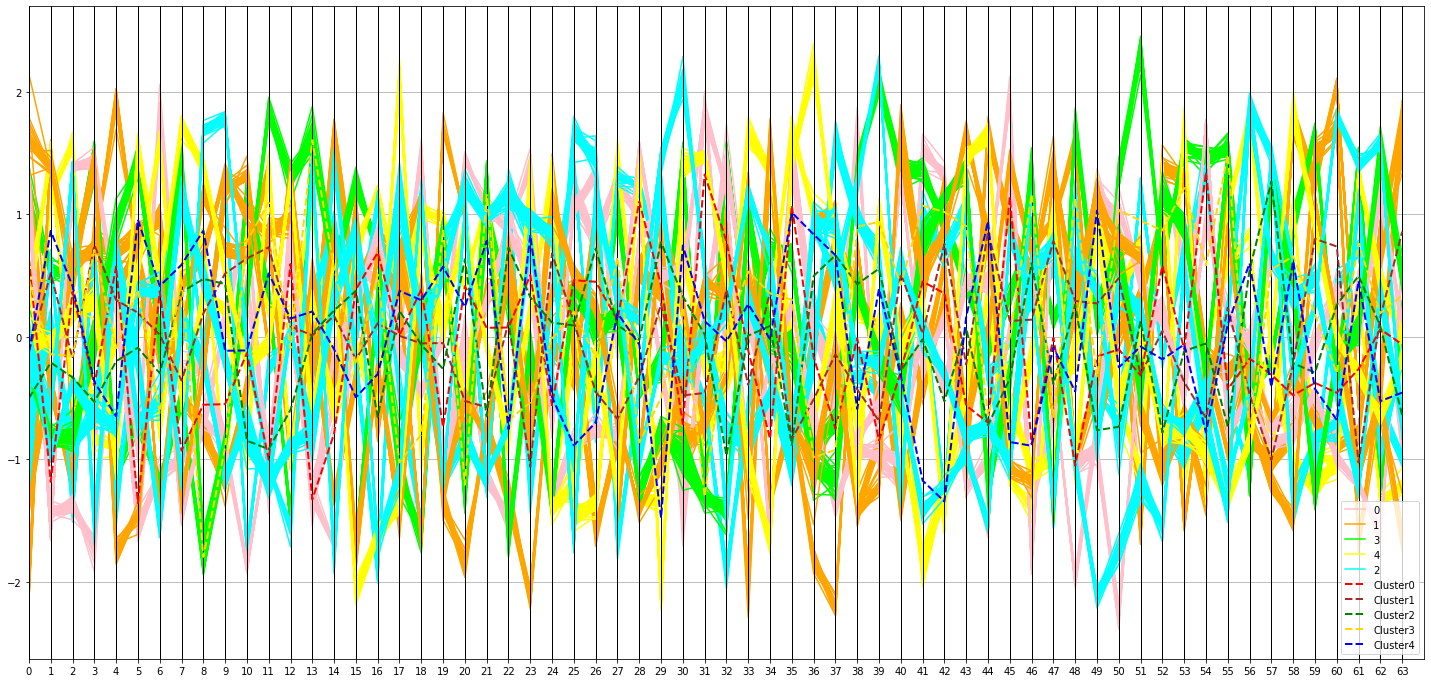

In [11]:
plt.figure(figsize=(25,12))
pd.plotting.parallel_coordinates(dfnorm,'lab',color=('pink','orange','lime','yellow','cyan'))
for i,j in enumerate(['red','brown','green','gold','blue']):
    a = sns.lineplot(x = range(64),y=cen[i],linestyle='--',linewidth=2,color=j,label='Cluster'+str(i))
a.set_xlim([0,64])    
a.set_xticks(range(64))  
plt.show()

Centers along with data points.